In [4]:
#彩色图片直方图
import cv2
import numpy as np
def ImageHist(image,type):
    color=(255,255,255)
    windowName = 'Gray'
    if type == 31:
        color = (255,0,0)
        windowName = 'B Hist'
    elif type ==32:
        color = (0,255,0)
        windowName = 'G Hist'
    elif type ==33:    
        color = (0,0,255)
        windowName = 'R Hist'
    #1 image 2 [0] 3 mask None 4 256 5 0-255
    hist = cv2.calcHist([image],[0],None,[256],[0.0,255.0])
    minV,maxV,minL,maxL = cv2.minMaxLoc(hist)
    histImg = np.zeros([256,256,3],np.uint8)
    for h in range(256):
        intenNormal = int(hist[h]*256/maxV)
        cv2.line(histImg,(h,256),(h,256-intenNormal),color)
    cv2.imshow(windowName,histImg)
    return histImg
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
channels = cv2.split(img)#RGB - R G B
for i in range(0,3):
    ImageHist(channels[i],31+i)
cv2.waitKey(0)

-1

In [1]:
#灰度直方图均衡化
import cv2
import numpy as np
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('src',gray)
dst = cv2.equalizeHist(gray)
cv2.imshow('dst',dst)
cv2.waitKey(0)




-1

In [1]:
#彩色图片的直方图均衡化
import cv2
import numpy as np
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
cv2.imshow('src',img)
(b,g,r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
result = cv2.merge((bH,gH,rH))

cv2.imshow('dst',result)
cv2.waitKey(0)

-1

In [2]:
#YUV 直方图均衡化
import cv2
import numpy as np
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
imgYUV = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
cv2.imshow('src',img)
channelYUV = cv2.split(imgYUV)
channelYUV[0] = cv2.equalizeHist(channelYUV[0])
channels = cv2.merge(channelYUV)
result = cv2.cvtColor(channels,cv2.COLOR_YCrCb2RGB)
cv2.imshow('dst',result)
cv2.waitKey(0)



-1

In [6]:
#修补图片 之破坏图片
import cv2
import numpy as np
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
for i in range(200,250):
    img[i,200] = (255,255,255)
    img[i,200+1] = (255,255,255)
    img[i,200-1] = (255,255,255)

for i in range(150,250):
    img[250,i] = (255,255,255)
    img[250+1,i] = (255,255,255)
    img[250-1,i] = (255,255,255)
cv2.imwrite("E:/tensflow/picturedeal/tim1.jpg",img)
cv2.imshow('image',img)
cv2.waitKey(0)




-1

In [1]:
#修补图片
import cv2
import numpy as np
img = cv2.imread("E:/tensflow/picturedeal/tim1.jpg",1)
cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
paint = np.zeros((height,width),np.uint8)
for i in range(200,250):
    paint[i,200] = 255
    paint[i,200+1] = 255
    paint[i,200-1] = 255

for i in range(150,250):
    paint[250,i] = 255
    paint[250+1,i] = 255
    paint[250-1,i] = 255

cv2.imshow('paint',paint)

imgDst = cv2.inpaint(img,paint,3,cv2.INPAINT_TELEA)

cv2.imshow('image',imgDst)
cv2.waitKey(0)



-1

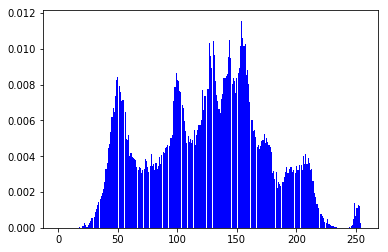

-1

In [7]:
#灰度图片直方图
#本质：统计每个像素灰度 出现的概率 0-255 p
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("E:/tensflow/picturedeal/tim1.jpg",1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
count = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index] = count[index]+1
for i in range(0,255):
    count[i] = count[i]/(height*width)
x = np.linspace(0,255,256)    
y = count
plt.bar(x,y,0.9,alpha = 1,color='b')
plt.show()
cv2.waitKey(0)





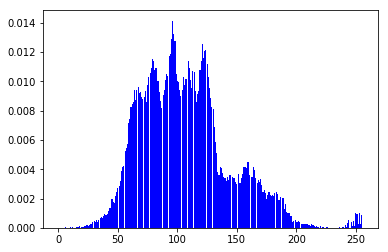

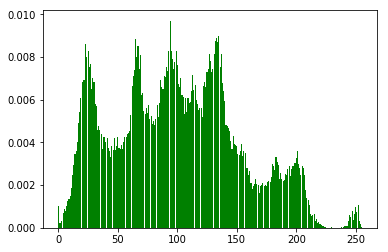

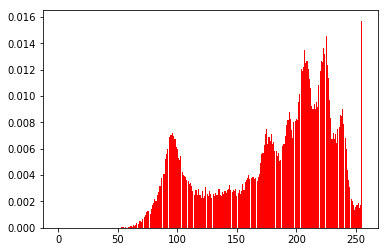

-1

In [6]:
#彩色图片直方图
#本质：统计每个像素灰度 出现的概率 0-255 p
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("E:/tensflow/picturedeal/tim1.jpg",1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

count_b = np.zeros(256,np.float)
count_g = np.zeros(256,np.float)
count_r = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        index_b = int(b)
        index_g = int(g)
        index_r = int(r)
        count_b[index_b] = count_b[index_b]+1
        count_g[index_g] = count_g[index_g]+1
        count_r[index_r] = count_r[index_r]+1
for i in range(0,256):
        count_b[i] = count_b[i]/(height*width)
        count_g[i] = count_g[i]/(height*width)
        count_r[i] = count_r[i]/(height*width)
x = np.linspace(0,255,256)
y1 = count_b
plt.figure()
plt.bar(x,y1,0.9,alpha=1,color='b')
y2 = count_g
plt.figure()
plt.bar(x,y2,0.9,alpha=1,color='g')   
y3 = count_r        
plt.figure()    
plt.bar(x,y3,0.9,alpha=1,color='r')
plt.show()
cv2.waitKey(0)

In [3]:
#灰度直方图均衡化1
#本质：统计每个像素灰度 出现的概率 0-255 p
#累计概率
#1 0.2  0.2
#2 0.3  0.5
#3 0.1  0.6
#256
#100 0.5 255*0.5 = new
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
count = np.zeros(256,np.float)
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        index = int(pixel)
        count[index] = count[index]+1
for i in range(0,255):
    count[i] = count[i]/(height*width)
sum1 = float(0)
for i in range(0,256):
    sum1 = sum1 + count[i]
    count[i] = sum1
#print(count)
#计算映射表
map1 = np.zeros(256,np.uint16)
for i in range(0,256):
    map1[i] = np.uint16(count[i]*255)
#映射
for i in range(0,height):
    for j in range(0,width):
        pixel = gray[i,j]
        gray[i,j] = map1[pixel]
cv2.imshow('dst',gray)
cv2.waitKey(0)








[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.52587891e-05 1.52587891e-05 1.52587891e-05 1.52587891e-05
 3.05175781e-05 3.05175781e-05 6.10351562e-05 1.52587891e-04
 2.28881836e-04 3.35693359e-04 5.34057617e-04 6.56127930e-04
 7.93457031e-04 9.15527344e-04 1.17492676e-03 1.69372559e-03
 2.18200684e-03 2.74658203e-03 3.28063965e-03 4.28771973e-03
 5.27954102e-03 6.45446777e-03 7.81250000e-03 9.50622559e-03
 1.11694336e-02 1.32141113e-02 1.54113770e-02 1.78985596e-02
 2.11029053e-02 2.47192383e-02 2.91290283e-02 3.39813232e-02
 3.92761230e-02 4.54864502e-02 5.22003174e-02 5.84869385e-02
 6.63146973e-02 7.42034912e-02 8.23516846e-02 9.06372070e-02
 9.78851318e-02 1.05377197e-01 1.12686157e-01 1.19537354e-01
 1.26129150e-01 1.31118774e-01 1.36062622e-01 1.41357422e-01
 1.45507812e-01 1.49642944e-01 1.53411865e-01 1.57379150e-01
 1.61254883e-01 1.649322

-1

In [1]:
#灰度直方图均衡化1
#本质：统计每个像素灰度 出现的概率 0-255 p
#累计概率
#1 0.2  0.2
#2 0.3  0.5
#3 0.1  0.6
#256
#100 0.5 255*0.5 = new
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

count_b = np.zeros(256,np.float)
count_g = np.zeros(256,np.float)
count_r = np.zeros(256,np.float)

for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        index_b = int(b)
        index_g = int(g)
        index_r = int(r)
        count_b[index_b] = count_b[index_b]+1
        count_g[index_g] = count_g[index_g]+1
        count_r[index_r] = count_r[index_r]+1
for i in range(0,255):
    count_b[i] = count_b[i]/(height*width)
    count_g[i] = count_g[i]/(height*width)
    count_r[i] = count_r[i]/(height*width)
sum_b = float(0)
sum_g = float(0)
sum_r = float(0)

for i in range(0,256):
    sum_b = sum_b + count_b[i]
    sum_g = sum_g + count_g[i]
    sum_r = sum_r + count_r[i]
    count_b[i] = sum_b
    count_g[i] = sum_g
    count_r[i] = sum_r
#print(count)
#计算映射表
map_b = np.zeros(256,np.uint16)
map_g = np.zeros(256,np.uint16)
map_r = np.zeros(256,np.uint16)
for i in range(0,256):
    map_b[i] = np.uint16(count_b[i]*255)
    map_g[i] = np.uint16(count_g[i]*255)
    map_r[i] = np.uint16(count_r[i]*255)
#映射
dst = np.zeros((height,width,3),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        b = map_b[b]
        g = map_g[g]
        r = map_r[r]
        dst[i,j] = (b,g,r)
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

In [2]:
#亮度增强
# p = p + 40
import cv2
import numpy as np
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst = np.zeros((height,width,3),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        bb = int(b) + 40
        gg = int(g) + 40
        rr = int(r) + 40
        if bb > 255:
            bb = 255
        if gg > 255:
            gg = 255
        if rr > 255:
            rr = 255
        dst[i,j] = (bb,gg,rr)
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

In [3]:
#亮度增强
# p = p*1 + 40 
import cv2
import numpy as np
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
cv2.imshow('src',img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst = np.zeros((height,width,3),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        bb = int(b*1.2) + 10
        gg = int(g*1.2) + 15
#        rr = int(r*1.2) + 40
        if bb > 255:
            bb = 255
        if gg > 255:
            gg = 255
#        if rr > 255:
 #           rr = 255
        dst[i,j] = (bb,gg,r)
cv2.imshow('dst',dst)
cv2.waitKey(0)

-1

In [ ]:
#双边滤波
import cv2
img = cv2.imread("E:/tensflow/picturedeal/tim.jpg",1)
cv2.imshow('src',img)
dst = cv2.bilateralFilter(img,15,35,35)
cv2.imshow('dst',dst)
cv2.waitKey(0)


